<a href="https://colab.research.google.com/github/Umerranjum/AI/blob/main/SpamAssignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np #For numerical operationn
import pandas as pd #To see data
import re #regular expressions
import nltk #for text manipulation
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
df1 = pd.read_csv('spam.csv', encoding='latin-1')

In [8]:
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
df1 = df1.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)


In [10]:
df1

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
# Convert all the text to lower characters
df1 = df1.apply(lambda x: x.astype(str).str.lower())


In [12]:
#Remove all the special characters & numbers
df1 = df1.replace(r'[^a-zA-Z\s]', '', regex=True)


In [13]:
#Abbreviations

In [14]:
X = df1['v2'] #Assigning the 'v2' column of df1 to the variable X
y = df1['v1'] #Assigning the 'v1' column of df1 to the variable y

In [15]:
# Vectorize the data in X
vec = CountVectorizer()
vec.fit(X)
vec.vocabulary_

{'go': 2846,
 'until': 7756,
 'jurong': 3740,
 'point': 5490,
 'crazy': 1557,
 'available': 489,
 'only': 5076,
 'in': 3457,
 'bugis': 944,
 'great': 2942,
 'world': 8254,
 'la': 3893,
 'buffet': 942,
 'cine': 1274,
 'there': 7329,
 'got': 2903,
 'amore': 247,
 'wat': 8003,
 'ok': 5036,
 'lar': 3929,
 'joking': 3708,
 'wif': 8144,
 'oni': 5070,
 'free': 2635,
 'entry': 2219,
 'wkly': 8205,
 'comp': 1390,
 'to': 7457,
 'win': 8159,
 'fa': 2355,
 'cup': 1614,
 'final': 2481,
 'tkts': 7446,
 'st': 6840,
 'may': 4373,
 'text': 7272,
 'receive': 5893,
 'questionstd': 5784,
 'txt': 7655,
 'ratetcs': 5837,
 'apply': 339,
 'overs': 5178,
 'dun': 2070,
 'say': 6242,
 'so': 6659,
 'early': 2092,
 'hor': 3279,
 'already': 220,
 'then': 7324,
 'nah': 4734,
 'dont': 1979,
 'think': 7353,
 'he': 3100,
 'goes': 2859,
 'usf': 7806,
 'lives': 4096,
 'around': 390,
 'here': 3155,
 'though': 7376,
 'freemsg': 2643,
 'hey': 3174,
 'darling': 1677,
 'its': 3613,
 'been': 648,
 'weeks': 8059,
 'now': 4931,


In [16]:
vec = CountVectorizer(stop_words='english')
vec.fit(X)
vocabulary = vec.vocabulary_

Now We'll convert convert X,y to numpy array 

In [17]:
X = df1['v2'].to_numpy()
Y = df1['v1'].to_numpy()
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(Y)
print(X)
print(y)

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat'
 'ok lar joking wif u oni'
 'free entry in  a wkly comp to win fa cup final tkts st may  text fa to  to receive entry questionstd txt ratetcs apply overs'
 ... 'pity  was in mood for that soany other suggestions'
 'the guy did some bitching but i acted like id be interested in buying something else next week and he gave it to us for free'
 'rofl its true to its name']
[0 0 1 ... 0 0 0]


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
vector = CountVectorizer()
X_train_count = vector.fit_transform(X_train)
X_test_count = vector.transform(X_test)
print(len(vector.vocabulary_))


7522




We'll use Logistic Regression method


In [41]:
logreg_model = LogisticRegression()
logreg_model.fit(X_train_count, y_train)
logreg_accuracy = logreg_model.score(X_test_count, y_test)
print("Logistic Regression Accuracy:", logreg_accuracy)

Logistic Regression Accuracy: 0.97847533632287


In [42]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_count, y_train)
dt_accuracy = dt_model.score(X_test_count, y_test)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.9605381165919282


In [47]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    score = clf.score(X_test, y_test)
    f1 = f1_score(y_test, y_pred)
    
    return accuracy, precision, score, f1

# Define and train your classifier
clf = LogisticRegression()  
clf.fit(X_train_count, y_train)

# Call the train_classifier function
accuracy, precision, score, f1 = train_classifier(clf, X_train_count, y_train, X_test_count, y_test)

print("Precision:", precision)


Precision: 0.9921875


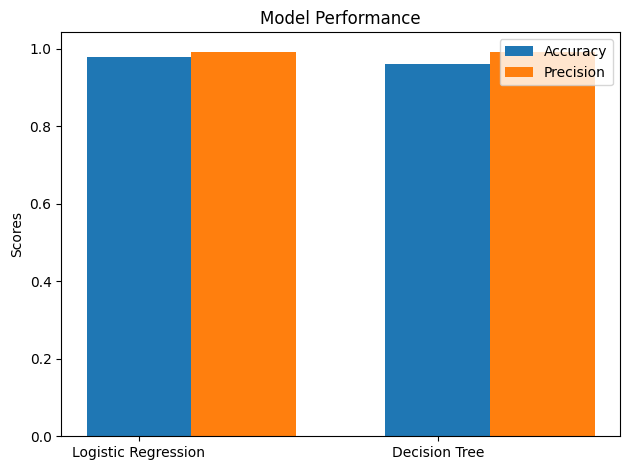

In [50]:
models = ["Logistic Regression", "Decision Tree"]
accuracy_scores = [logreg_accuracy, dt_accuracy]
precision_scores = [precision, 0.9921875]  

x = np.arange(len(models))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x, accuracy_scores, width, label='Accuracy')
rects2 = ax.bar(x + width, precision_scores, width, label='Precision')

ax.set_ylabel('Scores')
ax.set_title('Model Performance')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

fig.tight_layout()
plt.show()
